# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [2]:
#Import all the necessary modules
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics



# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [5]:
dataframe = pd.read_csv("diabetes.csv")
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [68]:
dataframe.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
305,2,120,76,37,105,39.7,0.215,29,0
263,3,142,80,15,0,32.4,0.200,63,0
176,6,85,78,0,0,31.2,0.382,42,0
64,7,114,66,0,0,32.8,0.258,42,1
276,7,106,60,24,0,26.5,0.296,29,1
498,7,195,70,33,145,25.1,0.163,55,1
336,0,117,0,0,0,33.8,0.932,44,0
18,1,103,30,38,83,43.3,0.183,33,0
755,1,128,88,39,110,36.5,1.057,37,1
435,0,141,0,0,0,42.4,0.205,29,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [27]:
print("shape of this data frame",dataframe.shape)
#datatypes of each column 
print("datatypes of each column of data frame\n",dataframe.dtypes)


shape of this data frame (768, 9)
datatypes of each column of data frame
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [46]:

dataframe_temp = dataframe.drop(["Pregnancies","Outcome"],axis = 1)
dataframe_temp
medians = dataframe_temp.median()
print("medians",medians)
dataframe_nonzero = dataframe_temp.replace(0,medians)
dataframe_nonzero["Pregnancies"] = dataframe["Pregnancies"]
dataframe_nonzero["Outcome"] = dataframe["Outcome"]
dataframe_nonzero

medians Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148,72,35,30.5,33.6,0.627,50,6,1
1,85,66,29,30.5,26.6,0.351,31,1,0
2,183,64,23,30.5,23.3,0.672,32,8,1
3,89,66,23,94.0,28.1,0.167,21,1,0
4,137,40,35,168.0,43.1,2.288,33,0,1
5,116,74,23,30.5,25.6,0.201,30,5,0
6,78,50,32,88.0,31.0,0.248,26,3,1
7,115,72,23,30.5,35.3,0.134,29,10,0
8,197,70,45,543.0,30.5,0.158,53,2,1
9,125,96,23,30.5,32.0,0.232,54,8,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [47]:
dataframe_nonzero.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,3.845052,0.348958
std,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,3.369578,0.476951
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,1.000000,0.000000
50%,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,3.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,6.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,17.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

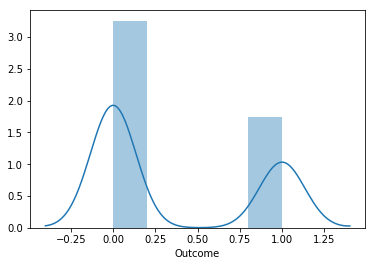

In [59]:

sns.distplot(dataframe_nonzero.Outcome,kde= True)


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [ ]:
# For "Glucose" feature


# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

In [65]:
dataframe_nonzero_corr = dataframe_nonzero.corr()
dataframe_nonzero_corr

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
Glucose,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.128213,0.492782
BloodPressure,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.208615,0.165723
SkinThickness,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.032568,0.189065
Insulin,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,-0.055697,0.148457
BMI,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.021546,0.312249
DiabetesPedigreeFunction,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,-0.033523,0.173844
Age,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.544341,0.238356
Pregnancies,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,1.000000,0.221898
Outcome,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,0.221898,1.000000


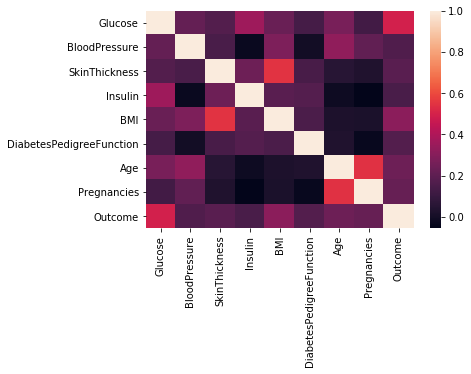

In [66]:
sns.heatmap(dataframe_nonzero_corr)

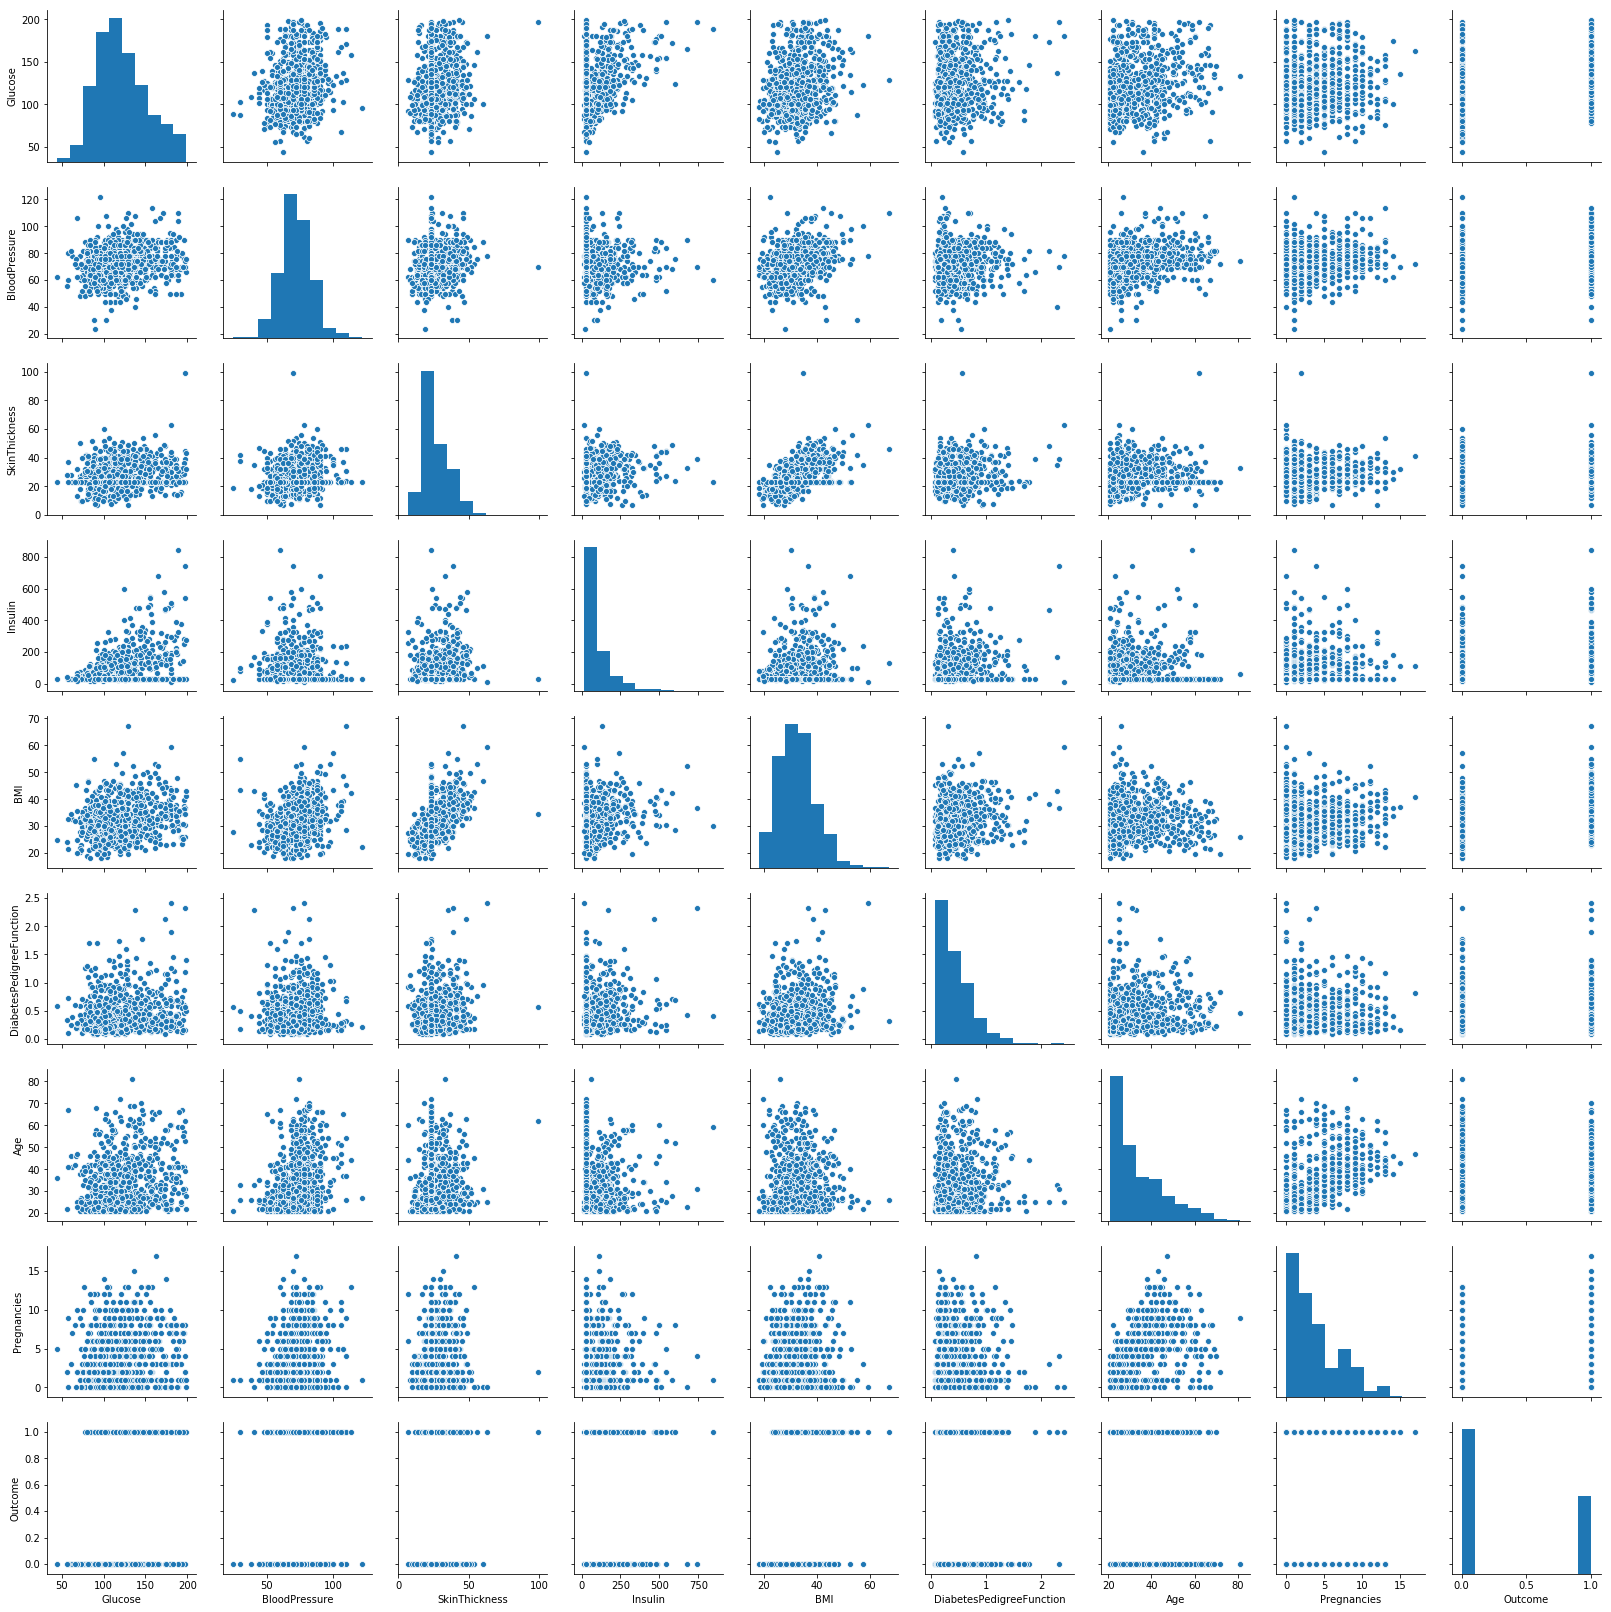

In [67]:
sns.pairplot(dataframe_nonzero)

In [ ]:
#Takeaways 
# Glucose feature has a high influnece on outcome. 
# There is a high correlation between number of pregnecies & Age
# there is a high correlation between BMI & skin thickness



# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [69]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = dataframe_nonzero.drop('Outcome', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = dataframe_nonzero[['Outcome']]
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [85]:
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier(criterion='entropy')
# Train Decision Tree Classifer
DecTree = DecTree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DecTree.predict(X_test)


# Q10 Print the accuracy of the model & print the confusion matrix 

In [94]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7316017316017316


Print the feature importance of the decision model - Optional

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_predict1 = model.predict(X_test)
model_score = metrics.accuracy_score(y_test,y_predict1)
print(model_score)

0.7532467532467533


C:\Users\Aadee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aadee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.